# 라이브러리

In [1]:
import pandas as pd
import numpy as np

# 데이터 불러오기

In [2]:
train = pd.read_csv('C:/Users/bsh36/Desktop/Data/bnb/train_users_2.csv')
test = pd.read_csv('C:/Users/bsh36/Desktop/Data/bnb/test_users.csv')
session = pd.read_csv('C:/Users/bsh36/Desktop/Data/bnb/sessions.csv')
sub = pd.read_csv('C:/Users/bsh36/Desktop/Data/bnb/sample_submission_NDF.csv')
country = pd.read_csv('C:/Users/bsh36/Desktop/Data/bnb/countries.csv')

# 전처리

In [3]:
session = session.rename(columns = {'user_id':'id'})

In [4]:
direct_action = session.groupby(['id','action'])['secs_elapsed'].agg(len).unstack().fillna(0)

In [5]:
direct_action1 = session.groupby(['id','action_type'])['secs_elapsed'].agg(len).unstack().fillna(0)
direct_action2 = session.groupby(['id','action_detail'])['secs_elapsed'].agg(len).unstack().fillna(0)

In [6]:
session[session['id']=='d1mm9tcy42']['action_type'].value_counts()

data            35
view            25
click           20
-unknown-        8
submit           1
message_post     1
Name: action_type, dtype: int64

In [7]:
onehot_action = pd.get_dummies(session['action_type'])
onehot_action['id'] = session['id']
onehot_action

,-unknown-,booking_request,booking_response,click,data,message_post,modify,partner_callback,submit,view,id
0,0,0,0,0,0,0,0,0,0,0,d1mm9tcy42
1,0,0,0,1,0,0,0,0,0,0,d1mm9tcy42
2,0,0,0,0,0,0,0,0,0,0,d1mm9tcy42
3,0,0,0,1,0,0,0,0,0,0,d1mm9tcy42
4,0,0,0,0,0,0,0,0,0,0,d1mm9tcy42
...,...,...,...,...,...,...,...,...,...,...,...
10567732,0,0,0,0,0,0,0,0,0,1,9uqfg8txu3
10567733,0,0,0,0,0,0,0,0,0,1,9uqfg8txu3
10567734,1,0,0,0,0,0,0,0,0,0,9uqfg8txu3
10567735,1,0,0,0,0,0,0,0,0,0,9uqfg8txu3


In [8]:
onehot_action.groupby('id').sum()

,-unknown-,booking_request,booking_response,click,data,message_post,modify,partner_callback,submit,view
id,,,,,,,,,,
00023iyk9l,0.0,1.0,0.0,4.0,9.0,1.0,0.0,1.0,0.0,21.0
0010k6l0om,5.0,0.0,0.0,16.0,9.0,0.0,0.0,1.0,0.0,17.0
001wyh0pz8,6.0,0.0,0.0,66.0,2.0,0.0,0.0,0.0,3.0,8.0
0028jgx1x1,1.0,0.0,0.0,9.0,5.0,0.0,0.0,0.0,1.0,15.0
002qnbzfs5,184.0,1.0,0.0,140.0,140.0,16.0,0.0,0.0,15.0,216.0
...,...,...,...,...,...,...,...,...,...,...
zzxox7jnrx,13.0,0.0,0.0,25.0,8.0,0.0,0.0,1.0,2.0,23.0
zzy7t0y9cm,0.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,1.0,1.0
zzysuoqg6x,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [9]:
act_type = session.groupby('id')['action','action_type','action_detail'].nunique()
act_type

c:\anaconda3\envs\project\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,action,action_type,action_detail
id,,,
00023iyk9l,13,6,13
0010k6l0om,11,5,8
001wyh0pz8,10,5,9
0028jgx1x1,5,5,6
002qnbzfs5,25,7,22
...,...,...,...
zzxox7jnrx,28,6,18
zzy7t0y9cm,7,4,6
zzysuoqg6x,3,3,3


In [10]:
action_time = session.groupby(['id','action'])['secs_elapsed'].agg(sum).unstack().fillna(0)
action_time

action,10,11,12,15,about_us,accept_decline,account,acculynk_bin_check_failed,acculynk_bin_check_success,acculynk_load_pin_pad,...,view,views,views_campaign,views_campaign_rules,webcam_upload,weibo_signup_referral_finish,why_host,widget,wishlists,zendesk_login_jwt
id,,,,,,,,,,,,,,,,,,,,,
00023iyk9l,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0010k6l0om,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001wyh0pz8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0028jgx1x1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
002qnbzfs5,301482.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zzxox7jnrx,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zzy7t0y9cm,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zzysuoqg6x,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
id_count = session.groupby('id')['secs_elapsed'].count()
id_count

id
00023iyk9l     39
0010k6l0om     62
001wyh0pz8     89
0028jgx1x1     30
002qnbzfs5    788
             ... 
zzxox7jnrx     88
zzy7t0y9cm      7
zzysuoqg6x      2
zzywmcn0jv     50
zzzlylp57e     73
Name: secs_elapsed, Length: 135483, dtype: int64

In [12]:
alldata = pd.concat([train, test])
alldata = pd.merge(alldata,id_count,on='id',how='left')
alldata = pd.merge(alldata, act_type, on='id', how='left')
alldata= pd.merge(alldata,direct_action, on ='id', how='left')
alldata= pd.merge(alldata,direct_action1, on ='id', how='left')
alldata= pd.merge(alldata,direct_action2, on ='id', how='left')
alldata = pd.merge(alldata,action_time,on='id',how='left')
alldata = alldata.fillna(-1)
alldata['action_ratio']= alldata['secs_elapsed']/alldata['action']
alldata['action_type_ratio_']= alldata['secs_elapsed']/alldata['action_type']
alldata['action_detail_ratio']= alldata['secs_elapsed']/alldata['action_detail']
alldata['date_account_created'] = pd.to_datetime(alldata['date_account_created'])
alldata['d_Year'] = alldata['date_account_created'].dt.year
alldata['d_Month'] = alldata['date_account_created'].dt.month
alldata['d_day'] = alldata['date_account_created'].dt.day
alldata['timestamp_first_active'] = pd.to_datetime(alldata['timestamp_first_active'])
alldata['t_Year'] = alldata['timestamp_first_active'].dt.year
alldata['t_month'] = alldata['timestamp_first_active'].dt.month
alldata['t_day'] = alldata['timestamp_first_active'].dt.day
alldata

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,zendesk_login_jwt_y,action_ratio,action_type_ratio_,action_detail_ratio,d_Year,d_Month,d_day,t_Year,t_month,t_day
0,gxn3p5htnn,2010-06-28,1970-01-01 05:34:50.319043255,-1,-unknown-,-1.0,facebook,0,en,direct,...,-1.0,1.000000,1.000000,1.000000,2010,6,28,1970,1,1
1,820tgsjxq7,2011-05-25,1970-01-01 05:34:50.523174809,-1,MALE,38.0,facebook,0,en,seo,...,-1.0,1.000000,1.000000,1.000000,2011,5,25,1970,1,1
2,4ft3gnwmtx,2010-09-28,1970-01-01 05:34:50.609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,...,-1.0,1.000000,1.000000,1.000000,2010,9,28,1970,1,1
3,bjjt8pjhuk,2011-12-05,1970-01-01 05:34:51.031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,...,-1.0,1.000000,1.000000,1.000000,2011,12,5,1970,1,1
4,87mebub9p4,2010-09-14,1970-01-01 05:34:51.208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,...,-1.0,1.000000,1.000000,1.000000,2010,9,14,1970,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275542,cv0na2lf5a,2014-09-30,1970-01-01 05:35:40.930235232,-1,-unknown-,31.0,basic,0,en,direct,...,0.0,3.172414,18.400000,3.285714,2014,9,30,1970,1,1
275543,zp8xfonng8,2014-09-30,1970-01-01 05:35:40.930235306,-1,-unknown-,-1.0,basic,23,ko,direct,...,0.0,2.714286,6.333333,3.166667,2014,9,30,1970,1,1
275544,fa6260ziny,2014-09-30,1970-01-01 05:35:40.930235408,-1,-unknown-,-1.0,basic,0,de,direct,...,0.0,4.529412,12.833333,5.923077,2014,9,30,1970,1,1
275545,87k0fy4ugm,2014-09-30,1970-01-01 05:35:40.930235430,-1,-unknown-,-1.0,basic,0,en,sem-brand,...,0.0,1.272727,2.800000,1.166667,2014,9,30,1970,1,1


In [13]:
alldata2 = alldata.drop(['id','country_destination','date_account_created','timestamp_first_active','date_first_booking'],axis=1)
alldata2

,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,...,zendesk_login_jwt_y,action_ratio,action_type_ratio_,action_detail_ratio,d_Year,d_Month,d_day,t_Year,t_month,t_day
0,-unknown-,-1.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,...,-1.0,1.000000,1.000000,1.000000,2010,6,28,1970,1,1
1,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,...,-1.0,1.000000,1.000000,1.000000,2011,5,25,1970,1,1
2,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,...,-1.0,1.000000,1.000000,1.000000,2010,9,28,1970,1,1
3,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,...,-1.0,1.000000,1.000000,1.000000,2011,12,5,1970,1,1
4,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,...,-1.0,1.000000,1.000000,1.000000,2010,9,14,1970,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275542,-unknown-,31.0,basic,0,en,direct,direct,untracked,Web,Windows Desktop,...,0.0,3.172414,18.400000,3.285714,2014,9,30,1970,1,1
275543,-unknown-,-1.0,basic,23,ko,direct,direct,untracked,Android,Android Phone,...,0.0,2.714286,6.333333,3.166667,2014,9,30,1970,1,1
275544,-unknown-,-1.0,basic,0,de,direct,direct,linked,Web,Windows Desktop,...,0.0,4.529412,12.833333,5.923077,2014,9,30,1970,1,1
275545,-unknown-,-1.0,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,...,0.0,1.272727,2.800000,1.166667,2014,9,30,1970,1,1


c:\anaconda3\envs\project\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='country_destination', ylabel='secs_elapsed'>

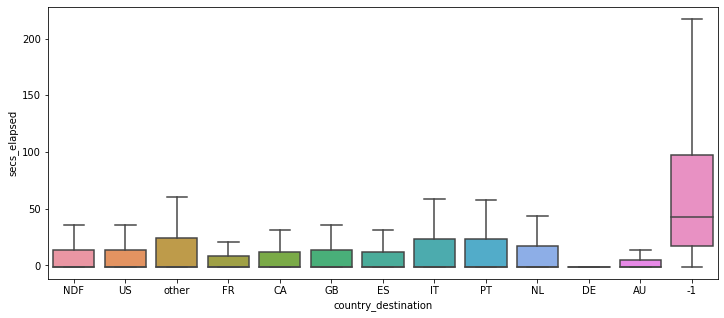

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
# ndf랑 pt의 차이가 없음 -> 구분할 수 있는 컬럼 만들기 
plt.figure(figsize=(12,5))
sns.boxplot(alldata['country_destination'], alldata['secs_elapsed'],showfliers=False)

c:\anaconda3\envs\project\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='country_destination', ylabel='action'>

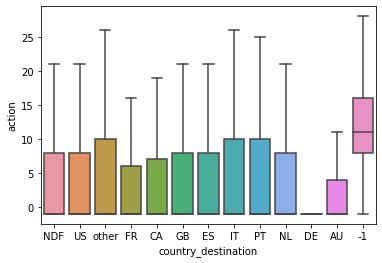

In [16]:
sns.boxplot(alldata['country_destination'],alldata['action'],showfliers=False)

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
c = alldata2.columns[alldata2.dtypes==object]

for i in c:
    alldata2[i] = le.fit_transform(list(alldata2[i]))
alldata2
label = le.fit_transform(train['country_destination'])


In [18]:
train2 = alldata2[:len(train)]
test2 = alldata2[len(train):]

# 모델링

In [19]:
from catboost import CatBoostClassifier
cbc = CatBoostClassifier(verbose=100)

In [ ]:
cbc.fit(train2, label,cat_features=[2,4,5,6,7,8,9])

In [ ]:
result = cbc.predict_proba(test2)

In [ ]:
ids = []
countries = []
test_id = test['id']
for i in range(len(test_id)):
    idx = test_id[i]
    ids +=[idx] *5
    countries += le.inverse_transform(np.argsort(result[i])[::-1])[:5].tolist()

In [ ]:
subm = pd.DataFrame(np.column_stack((ids,countries)),columns = ['id','country'])
subm

In [ ]:
subm.to_csv('C:/Users/bsh36/Desktop/Data/bnb/cbc.csv',index=False)